<a href="https://colab.research.google.com/github/Arihant-Surana/ARIHANT/blob/master/Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LOADING THE LIBRARIES AND DEPENDENCIES 


In [3]:
pip install keras    # Installing Keras 

In [4]:
!pip install tensorflow==1.14.0  # Installing Tensor Flow 

     |████████████████████████████████| 109.2MB 88kB/s 
     |████████████████████████████████| 3.2MB 44.1MB/s 
     |████████████████████████████████| 491kB 30.7MB/s 
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: tensorflow 2.2.0
    Uninstalling tensorflow-2.2.0:
      Successfully uninstalled tensorflow-2.2.0


In [21]:
import tensorflow as tf
print(tf.__version__)
from keras.backend.tensorflow_backend import set_session
from keras.models import Sequential
from keras import applications

import tensorflow as tf


1.14.0


INITIALIZING DATA AND LOADING THE LIBRARY 


In [8]:
#load the data
from keras.datasets import cifar10
(train_x,train_y),(x_test,y_test)=cifar10.load_data()
 #initializing 4 variables


In [10]:
                                #Take a look at the first image located at(x=0) in the trainind i.e train_x data set
train_x[0]
                                # we get back the array of the pixels 
                                #value 59 corresponds to Red  62 corresponds to Green 63 corresponds to Blue in the first row.

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

DISPLAYING AN IMAGE TO SHOW THAT THE DATA SET IS LOADED 


Lable is: [9]


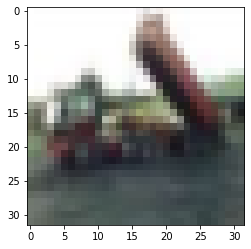

In [17]:
                                                    # Showing image as picture
                                                    # we have to use another library called matplotlib
import matplotlib.pyplot as plt                     # giving matplotlib an alias =  plt
img=plt.imshow(train_x[2])                          # showing the first image
  
                                                    # We cannot understand the image, this can be solved by the label. Labels are located at the y_train data set
                                                    # printing the label
print('Lable is:', train_y[2])




Lable is: [7]


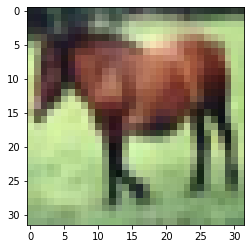

In [18]:
img=plt.imshow(train_x[7])                      # showing the sixth image
print('Lable is:', train_y[7])

ONE - HOT ENCODING


In [20]:
                                                  # One-Hot Encoding::Converting the lables into a set of 10 numbers  to input into the neural network
from keras.utils import to_categorical            #inbuilt in keras Library to categorise
train_y_one_hot= to_categorical(train_y)          # using to categorical function
y_test_one_hot=to_categorical(y_test)

                                                  #prininting the new lables 
print(train_y_one_hot)
print('*.*.*.*.*.')
print(y_test_one_hot)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]
*.*.*.*.*.
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [23]:
                                                    #print the example of new labels
print('The one hot label is:',train_y_one_hot[7])
                                                    # you can see that The value 1 corresponds to the postion 6 which is the value of the label initially beforre 
                                                    #-converting. Rest all values are 0 ranging from 0-10


The one hot label is: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


NORMALIZE DATA SET 


In [24]:
                                                      # Next step is to normalize the pixels in the data set...
                                                      # Normalize the pixels in the images to be values between 0 and 1 (we have to divide by 255) as pixel range is b/w 0-255
train_x=train_x/255
x_test=x_test/255



CREATING CNN 

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

model = Sequential()                                       #  Create the architecture

                                                          # Convolution layer to extract features from the input image, and create 32 ReLu
                                                          # 5x5 convolved features/layers aka feature map.
                                                          # Note:You must input the input shape only in this first layer.
                                                          # number of output channels or convolution filters = 32
                                                          # number of rows in the convolution kernel
                                                          # number of cols in the convolution kernel
                                                          # input shape 32x32 RGB image, so spacially it's 3-Dimensional
                                                          # activation function Rectifier Linear Unit aka (ReLu)
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32,32,3))) 


                                                          # Pooling layer with a 2x2 filter to get the max element from the convolved features , 
                                                          # this reduces the dimensionality by half e.g. 16x16, aka sub sampling
                                                          # Note: the default for stride is the pool_size
model.add(MaxPooling2D(pool_size=(2, 2)))



                                                          # 2nd Convolution layer with 64 channels
model.add(Conv2D(64, (5, 5), activation='relu'))

                                                          # Adding second Max Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

                                                          # Flattening, Flattens the input. Does not affect the batch size. 
                                                          # (Flattening occurs when you reduce all layers to one background layer), 
                                                          # this makes the image a linear array or 1D Array or 1D Vector to 
                                                          # feed into or connect with the neural network
model.add(Flatten())
model.add(Dense(1000, activation='relu'))                 # a layer with 1000 neurons and activation function ReLu
model.add(Dense(10, activation='softmax'))                #a layer with 10 output neurons for each label using softmax activation function

COMPILE

In [26]:

model.compile(loss='categorical_crossentropy',optimizer ='adam',metrics=['accuracy'])



TRAIN

In [27]:
#Train the model
hist=model.fit(train_x,train_y_one_hot, batch_size=256, epochs=25, validation_split=0.3)



Train on 35000 samples, validate on 15000 samples
Epoch 1/25
35000/35000 [==============================] - 72s 2ms/step - loss: 1.6745 - accuracy: 0.3923 - val_loss: 1.4194 - val_accuracy: 0.4885
Epoch 2/25
35000/35000 [==============================] - 73s 2ms/step - loss: 1.3156 - accuracy: 0.5265 - val_loss: 1.2335 - val_accuracy: 0.5626
Epoch 3/25
35000/35000 [==============================] - 73s 2ms/step - loss: 1.1680 - accuracy: 0.5853 - val_loss: 1.2037 - val_accuracy: 0.5719
Epoch 4/25
35000/35000 [==============================] - 73s 2ms/step - loss: 1.0458 - accuracy: 0.6308 - val_loss: 1.0748 - val_accuracy: 0.6202
Epoch 5/25
35000/35000 [==============================] - 74s 2ms/step - loss: 0.9517 - accuracy: 0.6673 - val_loss: 1.0409 - val_accuracy: 0.6328
Epoch 6/25
35000/35000 [==============================] - 73s 2ms/step - loss: 0.8613 - accuracy: 0.6993 - val_loss: 0.9953 - val_accuracy: 0.6517
Epoch 7/25
35000/35000 [==============================] - 73s 2ms/s

ACCURACY 

In [31]:
# printing the model accuracy 
print('Model accuracy-->>')
model.evaluate(x_test,y_test_one_hot)[1]

Model accuracy-->>
10000/10000 [==============================] - 6s 625us/step


0.6902999877929688

VISUALISATION VIA MATPLOTLIB

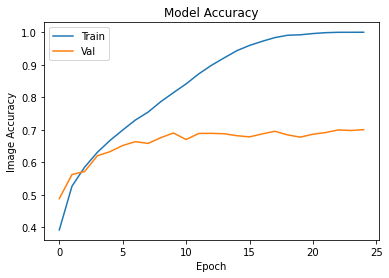

In [32]:
#visualize the models accuracy  

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel("Image Accuracy")
plt.xlabel("Epoch")
plt.legend(['Train','Val'], loc='upper left')
plt.show()

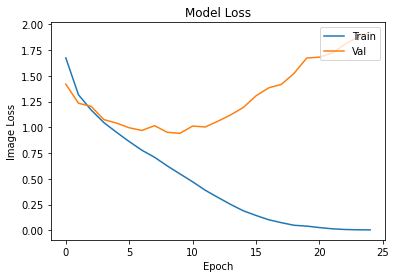

In [33]:
#visualize the models loss

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel("Image Loss")
plt.xlabel("Epoch")
plt.legend(['Train','Val'], loc='upper right')
plt.show()

UPLOADING THE IMAGE FROM THE COMPUTER

In [ ]:
from google.colab import files
uploaded = files.upload()
my_image=plt.imread('truck.jpg')

Saving truck.jpg to truck (1).jpg


DISPLAYING THE UPLOADED IMAGE 

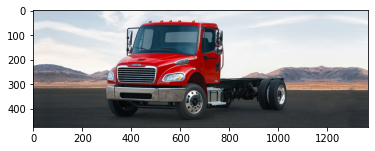

In [ ]:
#show the uploaded image
img = plt.imshow(my_image)

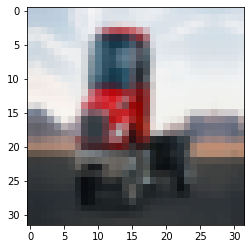

In [ ]:
#Resize the image using sk-image library
from skimage.transform import resize
my_image_resized=resize(my_image,(32,32,3))
img=plt.imshow(my_image_resized)

In [ ]:
# Getting the probability for each class 
import numpy as np
probabilities = model.predict(np.array([my_image_resized,]))          # we have to put the image in an array

                                                                      #printing the probabilities 
probabilities


array([[2.1184547e-10, 1.3086101e-09, 8.8647187e-07, 5.4871161e-09,
        3.8808185e-08, 5.2460720e-08, 2.2419797e-15, 1.3245478e-06,
        7.6241697e-05, 9.9992144e-01]], dtype=float32)

OUTPUT IN THE FORM OF PROBABILITIES 

In [ ]:
number_to_class=['airplane','automobile','bird','cat','Deer','Dog','Frog','Horse','Ship','Truck']
index=np.argsort(probabilities[0,:]) #sorting in ascending order
print('Most likely class:',number_to_class[index[9]],'--probability',probabilities[0,index[9]]*100)
print('Second Most likely class:',number_to_class[index[8]],'--probability',probabilities[0,index[8]]*100 )
print('Third Most likely class:',number_to_class[index[7]],'--probability',probabilities[0,index[7]]*100 )

Most likely class: Truck --probability 99.9921441078186
Second Most likely class: Ship --probability 0.007624169666087255
Third Most likely class: Horse --probability 0.00013245478385215392


In [ ]:
#Save the model 
model.save('image_classifer.h5')

In [ ]:
#Load the mode 
from keras.models import load_model
model= load_model('image_classifer.h5')